In [122]:
import pandas as pd
import numpy as np
df = pd.read_csv('D:\\Master 2 TAL\\Data Mining\\project\\fourth_hypothesis_df.csv',sep=',')
df

,MODV_50,MODV_20,MODV_32,IMMI_2,IMMI_1,EMPL_16,EMPL_21,EMPL_13,EMPL_15,EMPL_22,...,CS3_55,CS3_31,CS3_45,CS3_21,CS3_35,CS3_44,CS3_71,CS3_10,CS3_69,CS3_23
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474554,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474555,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474556,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
Binarized_df = pd.read_csv('D:\\Master 2 TAL\\Data Mining\\project\\Binarized_df.csv',sep=',')


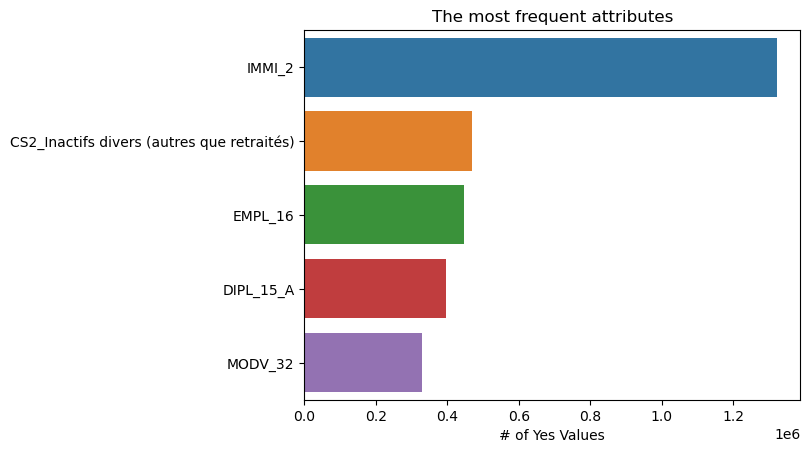

In [127]:
s = df.sum(0).sort_values(ascending=False).head()
sns.barplot(y=s.index, x=s.values)
plt.xlabel('# of Yes Values')
plt.title('The most frequent attributes')
plt.show()

In [125]:
matching_columns = [col for col in Binarized_df.columns if "CS2_" in col]
df_matching_columns = Binarized_df[matching_columns]

# Display the DataFrame with only the matching columns
print(df_matching_columns)


         CS2_Inactifs divers (autres que retraités)  \
0                                                 1   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
1474554                                           1   
1474555                                           1   
1474556                                           1   
1474557                                           1   
1474558                                           1   

         CS2_Anciens cadres et professions intermédiaires  \
0                                                       0   
1                                                       1   
2                                                       0   
3                                                       0   
4                                 

In [126]:
df = pd.concat([df, df_matching_columns], axis=1)


In [124]:
df.drop(columns=df_matching_columns, inplace=True) # No useful information

In [101]:
df.columns

Index(['MODV_50', 'MODV_20', 'MODV_32', 'IMMI_2', 'IMMI_1', 'EMPL_16',
       'EMPL_21', 'EMPL_13', 'EMPL_15', 'EMPL_22', 'EMPL_23', 'EMPL_11',
       'EMPL_12', 'EMPL_14', 'DIPL_15_A', 'DIPL_15_B', 'DIPL_15_D',
       'DIPL_15_C', 'NATC_4', 'NATC_5', 'NATC_6', 'NATC_7', 'CS3_85', 'CS3_75',
       'CS3_77', 'CS3_68', 'CS3_43', 'CS3_48', 'CS3_46', 'CS3_42', 'CS3_47',
       'CS3_65', 'CS3_38', 'CS3_72', 'CS3_78', 'CS3_67', 'CS3_56', 'CS3_84',
       'CS3_54', 'CS3_63', 'CS3_22', 'CS3_37', 'CS3_74', 'CS3_33', 'CS3_86',
       'CS3_52', 'CS3_81', 'CS3_53', 'CS3_64', 'CS3_62', 'CS3_34', 'CS3_55',
       'CS3_31', 'CS3_45', 'CS3_21', 'CS3_35', 'CS3_44', 'CS3_71', 'CS3_10',
       'CS3_69', 'CS3_23'],
      dtype='object')

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(df.values)

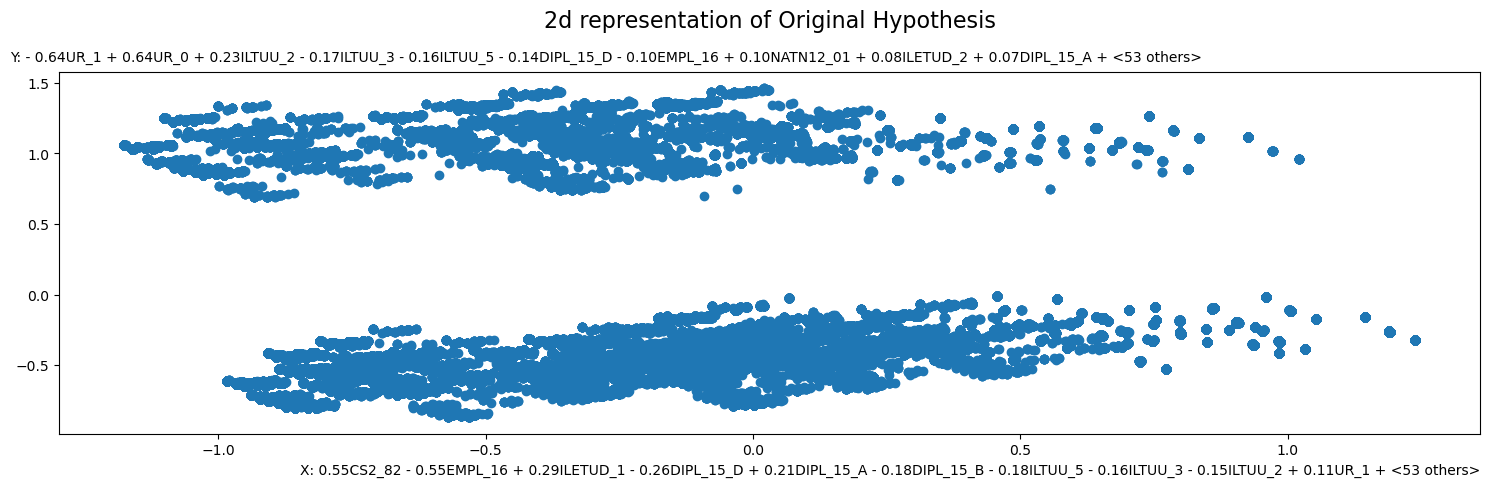

In [136]:

plt.figure(figsize=(15,5))

plt.scatter(X_transformed[:,0], X_transformed[:,1])

s = pd.Series(pca.components_[0], index=df.columns)
s_top = s[s.abs().sort_values(ascending=False).index].head(10)
label = 'X: ' + ''.join([[" - ", " + "][weight > 0] + f"{abs(weight):.2f}{m}" for m, weight in s_top.items()]).strip(' + ') + f" + <{len(s)-len(s_top)} others>"
plt.xlabel(label, loc='right')

s = pd.Series(pca.components_[1], index=df.columns)
s_top = s[s.abs().sort_values(ascending=False).index].head(10)
label = 'Y: ' + ''.join([[" - ", " + "][weight > 0] + f"{abs(weight):.2f}{m}" for m, weight in s_top.items()]).strip(' + ') + f" + <{len(s)-len(s_top)} others>"
plt.ylabel(label, rotation=0, ha='left', y=1.02)

plt.title('2d representation of Original Hypothesis', y=1.1, size=16)

plt.tight_layout()
plt.show()

# Randomy Sampled Dataset

In [140]:
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(chunk1.values)

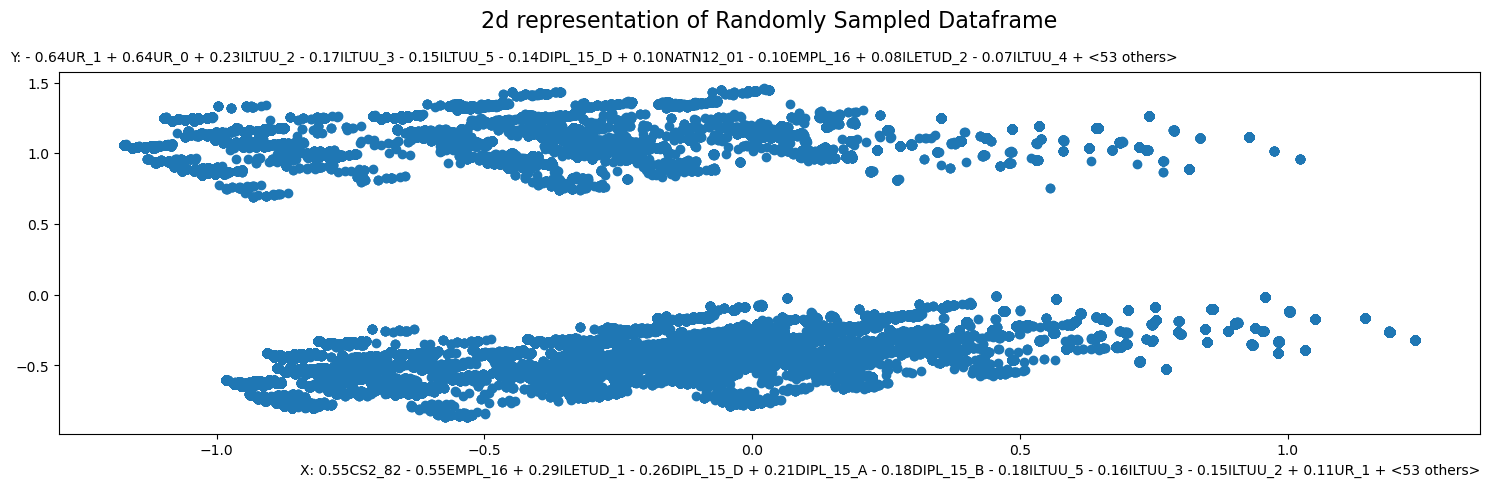

In [141]:

plt.figure(figsize=(15,5))

plt.scatter(X_transformed[:,0], X_transformed[:,1])

s = pd.Series(pca.components_[0], index=df.columns)
s_top = s[s.abs().sort_values(ascending=False).index].head(10)
label = 'X: ' + ''.join([[" - ", " + "][weight > 0] + f"{abs(weight):.2f}{m}" for m, weight in s_top.items()]).strip(' + ') + f" + <{len(s)-len(s_top)} others>"
plt.xlabel(label, loc='right')

s = pd.Series(pca.components_[1], index=df.columns)
s_top = s[s.abs().sort_values(ascending=False).index].head(10)
label = 'Y: ' + ''.join([[" - ", " + "][weight > 0] + f"{abs(weight):.2f}{m}" for m, weight in s_top.items()]).strip(' + ') + f" + <{len(s)-len(s_top)} others>"
plt.ylabel(label, rotation=0, ha='left', y=1.02)

plt.title('2d representation of Randomly Sampled Dataframe', y=1.1, size=16)

plt.tight_layout()
plt.show()

In [ ]:
for column in df.columns:
    plt.figure(figsize=(8, 5))

    # Create a KDE plot for the original DataFrame
    sns.kdeplot(df[column], label='Original DataFrame', fill=True)

    # Create a KDE plot for the first chunk
    sns.kdeplot(chunk1[column], label='Chunk 1', fill=True)

    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.title(f'KDE Plot Comparison: {column} (Original vs Chunk 1)')
    plt.show()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt



In [99]:
df.columns

Index(['Nationality', 'Occupation'], dtype='object')

In [67]:
def verbose(barray: 'frozenbitarray', names=df.columns):
  "Take bitarray and return a comma-separated names of representing indices of 1s"
  return ','.join(names[list(barray.itersearch(True))])

In [80]:
%%time
import time
import numpy as np
import caspailleur as csp
from IPython.display import Audio, display
try: 
        # Record the start time
        # Step 0. Preprocess the data
        itemsets_ba = csp.np2bas(df.values)
        print('doing step one ...')
        crosses_per_columns = list(csp.base_functions.bas2isets(csp.np2bas(df.values.T)))
        print('Done step 1')
    # Calculate the time taken
        # Step 1. Compute all extents in intents
        print('Doing list_intents_via_LCM ...')
        intents_ba = csp.list_intents_via_LCM(itemsets_ba, min_supp = 0.01)
        print('Done list_intents_via_LCM !')
        print('doing step intents_ba ...')  
            
    # Calculate the time taken
        print('doing step extent_intent_map ...')  
        extent_intent_map = {
            csp.base_functions.extension(intent.itersearch(True), crosses_per_columns): intent
            for intent in intents_ba
        }
        print('Done') 
            # Calculate the time taken
        extents = sorted(extent_intent_map, key=lambda ext: len(ext))
        print('doing step isets2bas ...')
        extents_ba = list(csp.base_functions.isets2bas(extents, len(itemsets_ba)))
        print('Done')
            # Calculate the time taken
        # Step 2. Find the best concepts (e.g. with the biggest stability)
        n_best = 20
        print('doing step delta_stability_index ...')
        stabilities = list(csp.indices.delta_stability_index(extents_ba))

            # Calculate the time taken
        print('doing step BET INDICES ...')
        best_indices = list(np.argsort(stabilities)[-n_best:])
        best_indices = sorted(best_indices, key=lambda i: extent_intent_map[extents[i]].count())
        best_extents = [extents[i] for i in best_indices]
        best_intents = [extent_intent_map[extents[i]] for i in best_indices]
        best_intents_plus_bottom = best_intents + intents_ba[-1:]
        print('done')
        print('doing step sort_intents_inclusion ...')
        # Step 3. Compute reduced intents that would make nice node titles
        children_ordering_with_bottom = csp.sort_intents_inclusion(best_intents_plus_bottom)
        print('done')
            # Calculate the time taken
        children_ordering = [children[:-1] for children in children_ordering_with_bottom[:-1]]
        print('doing step inverse_order ...')
        parents_ordering = csp.inverse_order(children_ordering)
        print('done')
            # Calculate the time taken
        reduced_intents = []
        print('doing step inverse_order ...')
        for intent, parents in zip(best_intents, parents_ordering):
          reduced_intent = intent
          for parent_i in parents.itersearch(True):
            reduced_intent = reduced_intent & ~best_intents[parent_i]
          reduced_intents.append(reduced_intent)
        print('done')
        reduced_intents_verb = [verbose(intent) for intent in reduced_intents]
        

        # Function to play a sound
        def play_sound():
            sample_rate = 44100
            duration = 1.0
            frequency = 440.0

            t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
            signal = 0.5 * np.sin(2 * np.pi * frequency * t)

            display(Audio(signal, rate=sample_rate, autoplay=True))

        # Function to display elapsed time


        # Your code goes here

        # Call play_sound() at the end of the cell to play the sound when execution finishes
        play_sound()
except Exception as e:
    def play_sound():
            sample_rate = 44100
            duration = 1.0
            frequency = 440.0

            t = np.linspace(0, duration, int(sample_rate * duration), endpoint=False)
            signal = 0.5 * np.sin(2 * np.pi * frequency * t)

            display(Audio(signal, rate=sample_rate, autoplay=True))

        # Function to display elapsed time

        
    # Access the original error message using the 'e' variable
    print(f"An error occurred: {e}")
        # Your code goes here
        # Call play_sound() at the end of the cell to play the sound when execution finishes
    play_sound()
# Display elapsed time

doing step one ...
Done step 1
Doing list_intents_via_LCM ...
Done list_intents_via_LCM !
doing step intents_ba ...
doing step extent_intent_map ...
Done
doing step isets2bas ...
Done
doing step delta_stability_index ...
doing step BET INDICES ...
done
doing step sort_intents_inclusion ...
done
doing step inverse_order ...
done
doing step inverse_order ...
done


CPU times: total: 53.7 s
Wall time: 54.3 s


Started 6:30 PM

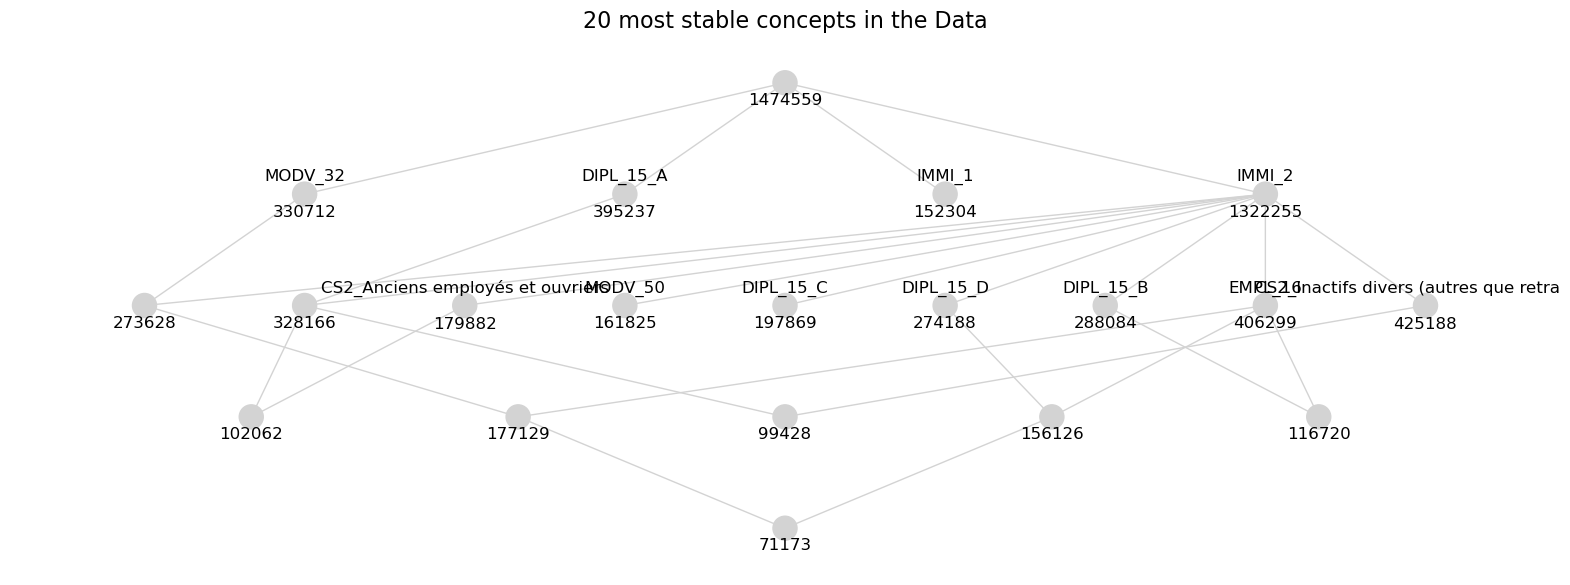

In [81]:
from fcapy.poset import POSet
from fcapy.visualizer import LineVizNx

poset = POSet(best_extents)

fig, ax = plt.subplots(figsize=(20,7))

viz = LineVizNx()
viz.draw_poset(
    poset, ax=ax,
    node_label_func = lambda el_i, P: f"{reduced_intents_verb[el_i]}\n\n{len(best_extents[el_i])}",
)
plt.title(f"{n_best} most stable concepts in the Data", size=16)

plt.show()

In [22]:
count_result = df['IMMI_1'].value_counts()
count_result

IMMI_1
0    1322255
1     152304
Name: count, dtype: int64

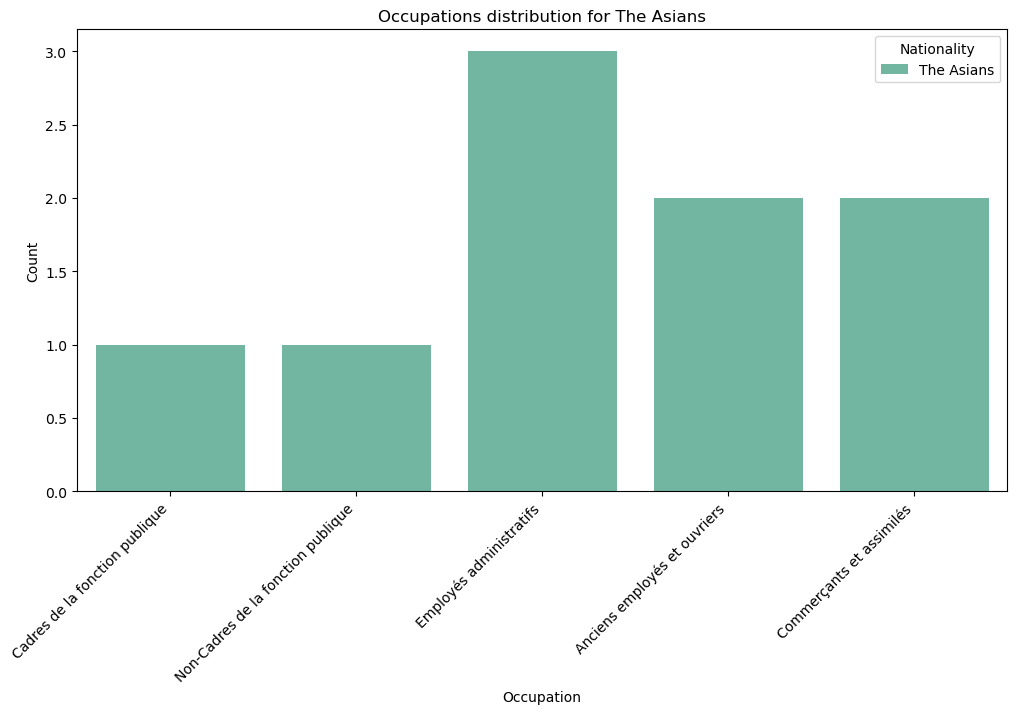

In [135]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data
data = {
    'Nationality': ['The Asians'] * 9,
    'Occupation': ['Cadres de la fonction publique', 'Non-Cadres de la fonction publique', 'Employés administratifs', 'Employés administratifs', 'Employés administratifs', 
                   'Anciens employés et ouvriers', 'Anciens employés et ouvriers', 'Commerçants et assimilés', 'Commerçants et assimilés']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Count Plot
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', data=df, hue='Nationality', palette='Set2')
plt.title('Occupations distribution for The Asians')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


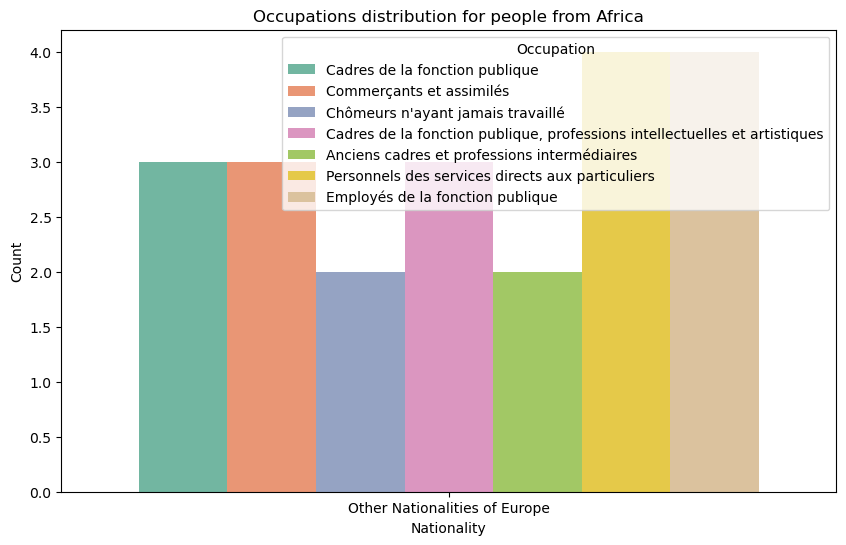

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data for Other Nationalities of Europe
data_europe = {
    'Nationality': ['Other Nationalities of Europe'] * 21,
    'Occupation': ['Cadres de la fonction publique','Cadres de la fonction publique','Cadres de la fonction publique','Commerçants et assimilés','Commerçants et assimilés','Commerçants et assimilés',"Chômeurs n'ayant jamais travaillé","Chômeurs n'ayant jamais travaillé",'Cadres de la fonction publique, professions intellectuelles et artistiques','Cadres de la fonction publique, professions intellectuelles et artistiques','Cadres de la fonction publique, professions intellectuelles et artistiques','Anciens cadres et professions intermédiaires','Anciens cadres et professions intermédiaires','Personnels des services directs aux particuliers','Personnels des services directs aux particuliers','Personnels des services directs aux particuliers','Personnels des services directs aux particuliers','Employés de la fonction publique','Employés de la fonction publique','Employés de la fonction publique','Employés de la fonction publique']
}

# Create a DataFrame for Other Nationalities of Europe
df_europe = pd.DataFrame(data_europe)

# Create a DataFrame for Other Nationalities of Europe
# Bar Plot for Other Nationalities of Europe
plt.figure(figsize=(10, 6))
sns.countplot(x='Nationality', data=df_europe, hue='Occupation', palette='Set2')
plt.title('Occupations distribution for people from Africa')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.show()


In [138]:
import pandas as pd
from tabulate import tabulate

# Data for DIPL_15_Baccalauréat
data_baccalaureat = {
    'DIPL_15_Baccalauréat': ['Employés de commerce', 'Cadres de la fonction publique',
                             'Personnels des services directs aux particuliers', 'Ouvriers qualifiés',
                             "Chômeurs n'ayant jamais travaillé", 'Employés de la fonction publique'],
}

# Create a DataFrame for DIPL_15_Baccalauréat
df_baccalaureat = pd.DataFrame(data_baccalaureat)

# Display the DataFrame as a nice table
print("DIPL_15_Baccalauréat:")
print(tabulate(df_baccalaureat, headers='keys', tablefmt='pretty'))
print("\n")

# Data for DIPL_15_Diplôme d'études supérieures
data_diplome_superieur = {
    'DIPL_15_Diplôme d\'études supérieures': ['Commerçants et assimilés', 'Personnels des services directs aux particuliers',
                                               'Employés de la fonction publique', 'Ouvriers qualifiés'],
}

# Create a DataFrame for DIPL_15_Diplôme d'études supérieures
df_diplome_superieur = pd.DataFrame(data_diplome_superieur)

# Display the DataFrame as a nice table
print("DIPL_15_Diplôme d'études supérieures:")
print(tabulate(df_diplome_superieur, headers='keys', tablefmt='pretty'))
print("\n")

# Data for DIPL_15_Aucun diplôme ou au mieux BEPC, brevet des collèges ou DNB
data_aucun_diplome = {
    'DIPL_15_Aucun diplôme ou au mieux BEPC, brevet des collèges ou DNB': ['Commerçants et assimilés', 'Employés administratifs d\'entreprise',
                                                                             'Professions intermédiaires de l\'enseignement, de la santé, de la fonction publique et assimilés',
                                                                             'Employés de la fonction publique', 'Personnels des services directs aux particuliers'],
}

# Create a DataFrame for DIPL_15_Aucun diplôme ou au mieux BEPC, brevet des collèges ou DNB
df_aucun_diplome = pd.DataFrame(data_aucun_diplome)

# Display the DataFrame as a nice table
print("DIPL_15_Aucun diplôme ou au mieux BEPC, brevet des collèges ou DNB:")
print(tabulate(df_aucun_diplome, headers='keys', tablefmt='pretty'))


DIPL_15_Baccalauréat:
+---+--------------------------------------------------+
|   |               DIPL_15_Baccalauréat               |
+---+--------------------------------------------------+
| 0 |               Employés de commerce               |
| 1 |          Cadres de la fonction publique          |
| 2 | Personnels des services directs aux particuliers |
| 3 |                Ouvriers qualifiés                |
| 4 |        Chômeurs n'ayant jamais travaillé         |
| 5 |         Employés de la fonction publique         |
+---+--------------------------------------------------+


DIPL_15_Diplôme d'études supérieures:
+---+--------------------------------------------------+
|   |       DIPL_15_Diplôme d'études supérieures       |
+---+--------------------------------------------------+
| 0 |             Commerçants et assimilés             |
| 1 | Personnels des services directs aux particuliers |
| 2 |         Employés de la fonction publique         |
| 3 |                Ouvri

In [ ]:
itemsets_ba = csp.np2bas(df.values)
intents_ba = csp.list_intents_via_LCM(itemsets_ba, min_supp=0.00005)
keys_dict = csp.list_keys(intents_ba)

# If no objects are described by all attributes,
# then drop the keys of bottom intent from computations
if not any(itemset_ba.all() for itemset_ba in itemsets_ba):
  keys_dict = {key: i for key, i in keys_dict.items() if not intents_ba[i].all()}

pseudo_intents = csp.list_pseudo_intents_via_keys(keys_dict.items(), intents_ba, use_tqdm=True, n_keys=len(keys_dict))
print(len(pseudo_intents))

In [76]:
for i, (pintent, intent_i) in enumerate(pseudo_intents):
  pintent_verb = verbose(pintent)
  conclusion = intents_ba[intent_i] & ~pintent
  conclusion_verb = verbose(conclusion)
  print(f"{i}: {pintent_verb} => {conclusion_verb}")
     

0: NATC_6,CS2_Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés => IMMI_1
1: NATC_5,CS2_Anciens cadres et professions intermédiaires => IMMI_1
2: NATC_4,CS2_Ouvriers agricoles => IMMI_1
3: EMPL_13,NATC_5 => IMMI_1
4: DIPL_15_C,NATC_4,CS2_Employés de commerce => IMMI_1
5: DIPL_15_C,NATC_4,CS2_Cadres de la fonction publique, professions intellectuelles et artistiques => IMMI_1
6: DIPL_15_D,NATC_5,CS2_Cadres de la fonction publique, professions intellectuelles et artistiques => IMMI_1
7: DIPL_15_D,NATC_5,CS2_Employés administratifs d'entreprise => IMMI_1
8: DIPL_15_D,NATC_4,CS2_Commerçants et assimilés => IMMI_1
9: DIPL_15_B,NATC_4,CS2_Chômeurs n'ayant jamais travaillé => IMMI_1
10: DIPL_15_A,NATC_4,CS2_Commerçants et assimilés => IMMI_1
11: DIPL_15_A,NATC_4,CS2_Employés administratifs d'entreprise => IMMI_1
12: DIPL_15_A,NATC_4,CS2_Professions intermédiaires de l'enseignement, de la santé, de la fonction publique et assimilés => IMMI_1
13: EM